In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/ankurkumar/Downloads/amazon0302.txt',low_memory=False,header=3, sep='\t')
df.head()


# FromNodeId  ToNodeId
0             0         1
1             0         2
2             0         3
3             0         4
4             0         5

In [3]:
df=df.iloc[0:5000]

In [4]:
graph = nx.from_pandas_edgelist(df,source="# FromNodeId",target="ToNodeId",create_using=nx.DiGraph())

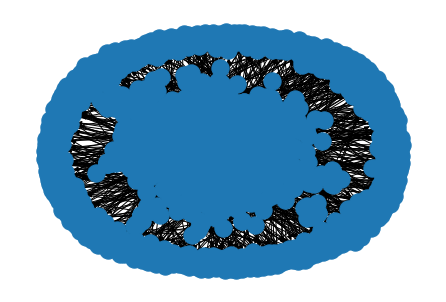

In [5]:

nx.draw(graph)

In [6]:
type(graph)


networkx.classes.digraph.DiGraph

In [7]:
nx.info(graph)

'DiGraph with 1761 nodes and 5000 edges'

In [8]:
graph.number_of_nodes()

1761

In [9]:
len(graph.edges())

5000

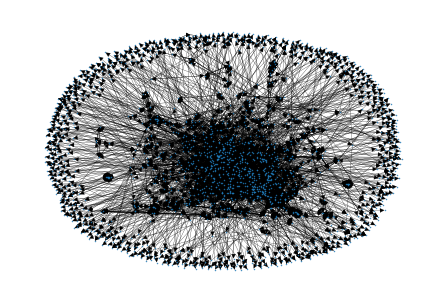

In [10]:
nx.draw(graph,pos=nx.spring_layout(graph), node_size=0.2, width=0.25)

In [11]:
# Average shortest path length
print("Average shortest path length:", nx.average_shortest_path_length(graph))

Average shortest path length: 4.854508027463734


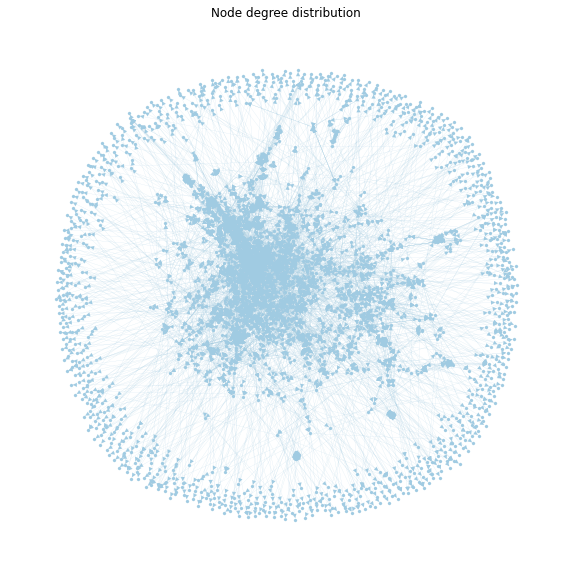

In [12]:
# Plot the node degree distribution
plt.figure(figsize=(10,10))
plt.title("Node degree distribution")
nx.draw_spring(graph, with_labels=False, node_size=10, node_color='#A0CBE2', edge_color='#A0CBE2', font_size=8, font_color='#000000', width=0.1, linewidths=0.1, font_weight='bold')
plt.savefig('/Users/ankurkumar/Downloads/amazon0302_node_degree_distribution.png')
plt.show()


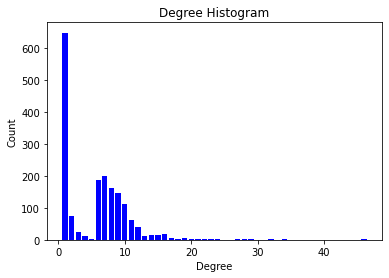

In [13]:
# node degree distribution
import collections
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()


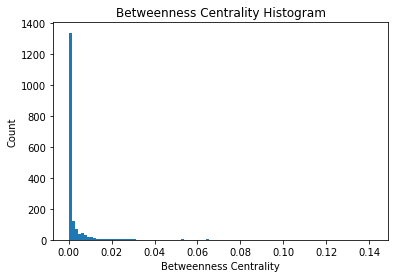

In [14]:
# Plot betweenness centrality
plt.hist(list(nx.betweenness_centrality(graph).values()), bins=100)
plt.title("Betweenness Centrality Histogram")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Count")
plt.show()


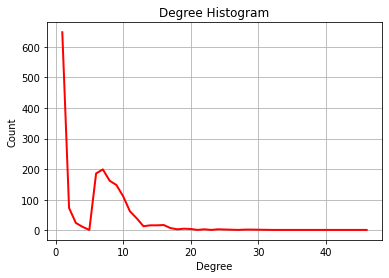

In [15]:
# Node degree distribution showing only line chart
plt.plot(deg, cnt, 'r-', linewidth=2, markersize=3)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.grid('True')


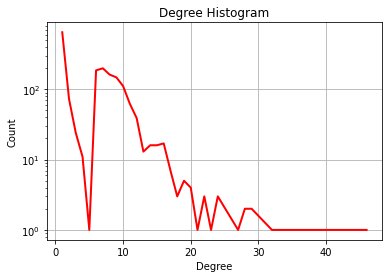

In [16]:
# Log graph of node degree distribution showing line chart
plt.plot(deg, cnt, 'r-', linewidth=2, markersize=3)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.yscale('log')
plt.grid(True)

In [17]:
# Number of nodes
print("Number of nodes:", graph.number_of_nodes())
# Number of edges
print("Number of edges:", graph.number_of_edges())

# Average shortest path length
print("Average shortest path length:", nx.average_shortest_path_length(graph))
# Density
print("Density:", nx.density(graph))
# Degree assortativity
print("Degree assortativity:", nx.degree_assortativity_coefficient(graph))
# Strongly connected components
print("Strongly connected components:", nx.number_strongly_connected_components(graph))
# Weakly connected components
print("Weakly connected components:", nx.number_weakly_connected_components(graph))

Number of nodes: 1761
Number of edges: 5000
Average shortest path length: 4.854508027463734
Density: 0.001613236281038666
Degree assortativity: 0.002771170185512739
Strongly connected components: 817
Weakly connected components: 1


In [18]:
print('Density:' +str(nx.density(graph)))

Density:0.001613236281038666


In [19]:
print('Assortativity:'+ str(nx.degree_assortativity_coefficient(graph)))

Assortativity:0.002771170185512739


In [20]:
#top 10 Betweenness Centrality 
print("Top 10 Betweenness Centrality:", sorted(nx.betweenness_centrality(graph).items(), key=lambda x: x[1], reverse=True)[:10])


Top 10 Betweenness Centrality: [(18, 0.14182854776256415), (8, 0.10085058015972094), (481, 0.08630284554124132), (32, 0.07797583030664247), (84, 0.07208288006316016), (54, 0.06768693732584233), (97, 0.06479988956122545), (150, 0.06478081196569603), (30, 0.06251506164732816), (170, 0.05826535862628155)]


In [21]:
#top 10 closeness Centrality
print("Top 10 closeness centrality:", sorted(nx.closeness_centrality(graph).items(), key=lambda x: x[1], reverse=True)[:10])

Top 10 closeness centrality: [(8, 0.13906801163438332), (23, 0.11832661980359635), (30, 0.11771299861187501), (21, 0.11607438016528926), (13, 0.11574555755858873), (20, 0.11224775224775226), (22, 0.11111825351694811), (24, 0.10820493066255779), (7, 0.10565860309847896), (9, 0.10378763880569507)]


Text(0.5, 0, 'Node')

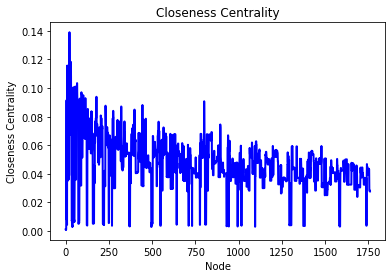

In [22]:
# Pyplot of closeness centrality
plt.plot(list(nx.closeness_centrality(graph).values()), 'b-', linewidth=2, markersize=3)
plt.title("Closeness Centrality")
plt.ylabel("Closeness Centrality")
plt.xlabel("Node")



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


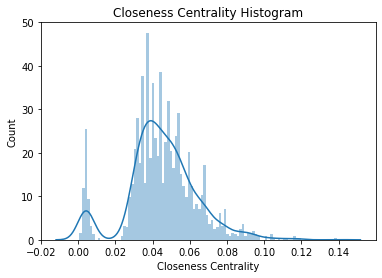

In [23]:
import seaborn as sns
sns.distplot(list(nx.closeness_centrality(graph).values()), bins=100)
plt.title("Closeness Centrality Histogram")
plt.xlabel("Closeness Centrality")
plt.ylabel("Count")
plt.show()


In [24]:
#top 10 Degree Centrality 
deg_cen = dict (nx.degree(graph))
print (sorted(deg_cen.items(), key=lambda x: x[1], reverse=True)[:10])

[(8, 46), (18, 34), (346, 32), (63, 29), (33, 29), (78, 28), (99, 28), (481, 27), (13, 24), (30, 24)]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

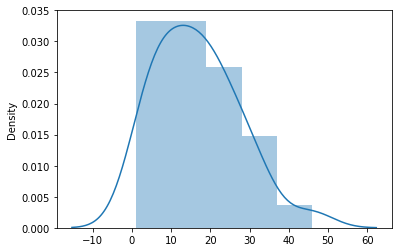

In [25]:
import seaborn as sns
idegree = dict(nx.degree(graph)) # dictionary node:degree
ivalues = sorted(set(idegree.values()))
sns.distplot(ivalues)

In [26]:
nx.average_clustering(graph)

0.22223352365791071

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

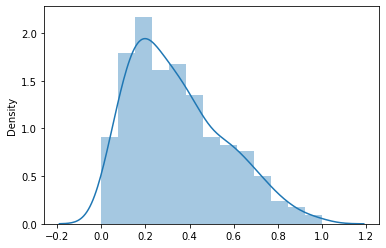

In [27]:
import seaborn as sns
idegree = dict(nx.clustering(graph)) # dictionary node:degree
ivalues = sorted(set(idegree.values()))
sns.distplot(ivalues)

In [28]:
hubs,auth = nx.hits(graph)

print (sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:10])

[(20, 0.012448285171366015), (210, 0.011449133576541835), (17, 0.011277406932100638), (6, 0.011205097463568837), (98, 0.011158512893485085), (784, 0.010867006818827688), (97, 0.010777596331915051), (7, 0.010617731779802112), (5, 0.010610704625244508), (504, 0.01050927405173931)]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

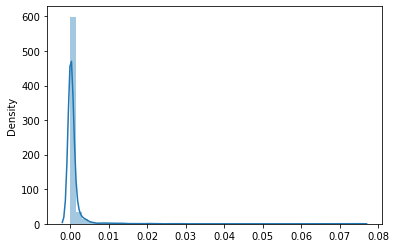

In [29]:
hubs, authorities = nx.hits(graph)
iauth = sorted(set(authorities.values()))
ihubs = sorted(set(hubs.values()))
sns.distplot(iauth)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

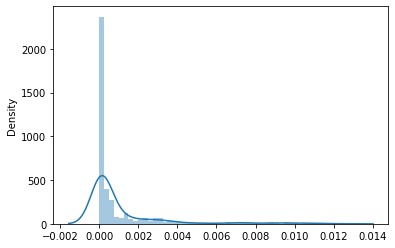

In [30]:
sns.distplot(ihubs)

In [31]:
# pagerank=nx.pagerank(graph)

# print (sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10])
# Top 10 nodes on Pagerank
print("Top 10 nodes on Pagerank:", sorted(nx.pagerank(graph).items(), key=lambda x: x[1], reverse=True)[:10])


Top 10 nodes on Pagerank: [(8, 0.013902009325647361), (23, 0.009650273946974836), (30, 0.008071133203289315), (13, 0.007572442145456996), (20, 0.007249781298955561), (33, 0.005438683132732397), (21, 0.005260314045709617), (7, 0.004661144935358674), (24, 0.00453442329408685), (9, 0.004372649405424238)]


In [32]:
print  (" Transitivity: " + str( round(nx.transitivity(graph),4)) + "\n Avg. Short Path: " + str(round(nx.average_shortest_path_length(graph),4)))

 Transitivity: 0.3309
 Avg. Short Path: 4.8545


In [33]:
# Average in degree
import numpy as np
print("Average in degree:", np.mean(list(dict(graph.in_degree()).values())))

# Average out degree
print("Average out degree of a graph:", np.mean(list(dict(graph.out_degree()).values())))

Average in degree: 2.8392958546280522
Average out degree of a graph: 2.8392958546280522


In [35]:
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True) # used for degree distribution and powerlaw test

In [37]:
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence) 

Calculating best minimal value for power law fit


<AxesSubplot:>

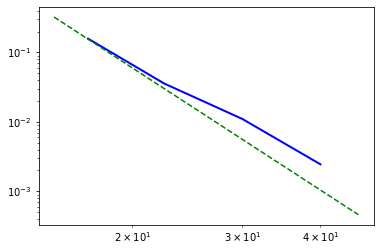

In [38]:
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

In [39]:
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print (R, p)

2.09406282446846 0.036254384152575765


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


<AxesSubplot:>

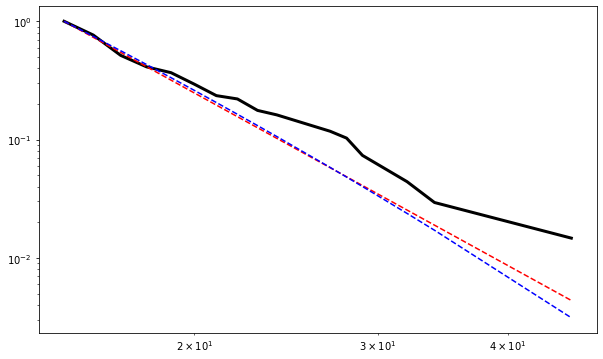

In [40]:
plt.figure(figsize=(10, 6))
fit.distribution_compare('power_law', 'lognormal')
fig4 = fit.plot_ccdf(linewidth=3, color='black')
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--') #stretched_exponential